<a href="https://colab.research.google.com/github/Binaryninja45/EPL_EDA/blob/main/EPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Matplotlib, pandas, and Seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

In [2]:
epl = pd.read_csv("/content/EPL.csv")
epl.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [3]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [4]:
epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD', 'Qualification or relegation']]

In [5]:
# Create update_result function that updates values to shortened versions and name it
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    elif 'Europa' in result or 'UEFA' in result:
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'Relegated'
    else:
        result = '-'
    return result

In [6]:
epl_condensed = epl_condensed.rename(columns={'Qualification or relegation' : 'Result'})

epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)

print(epl_condensed['Result'].value_counts())

-                   220
Champions League     89
Europa               68
Relegated            63
Name: Result, dtype: int64


### Groupby Champions League

In [7]:
cl_qual = epl_condensed[epl_condensed.Result == 'Champions League']

cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max', 'Pts':'min', 'GD':'min'})

print(cl_qual_stats)

         Pos  Pts  GD
Season               
2000-01    3   69  25
2001-02    4   71  22
2002-03    4   67  15
2003-04    4   60  18
2004-05    5   58  -1
2005-06    4   67  32
2006-07    4   68  28
2007-08    4   76  39
2008-09    4   72  31
2009-10    4   70  26
2010-11    4   68  27
2011-12    6   64  19
2012-13    4   73  32
2013-14    4   79  27
2014-15    4   70  25
2015-16    4   66  29
2016-17    6   69  25
2017-18    4   75  38
2018-19    4   71  24
2019-20    4   66  15
2020-21    4   67  22
2021-22    4   71  29


In [8]:
eu_qual = epl_condensed[epl_condensed.Result == 'Europa']

eu_qual_stats = eu_qual.groupby('Season').agg({'Pos':'max', 'Pts':'min', 'GD':'min'})

print(eu_qual_stats)

         Pos  Pts  GD
Season               
2000-01    6   61  15
2001-02   18   36 -23
2002-03    9   51  -7
2003-04   11   48  -8
2004-05    7   55   5
2005-06    9   55  -3
2006-07    7   56  -5
2007-08   11   46  -8
2008-09    7   53   5
2009-10    7   63  13
2010-11   18   39 -21
2011-12    8   52   5
2012-13   18   36 -26
2013-14   16   37 -15
2014-15   12   47  -3
2015-16    7   62  14
2016-17    7   61  18
2017-18    7   54  -3
2018-19    7   57   1
2019-20    8   56   8
2020-21    7   62  15
2021-22    7   56   0


### Plot

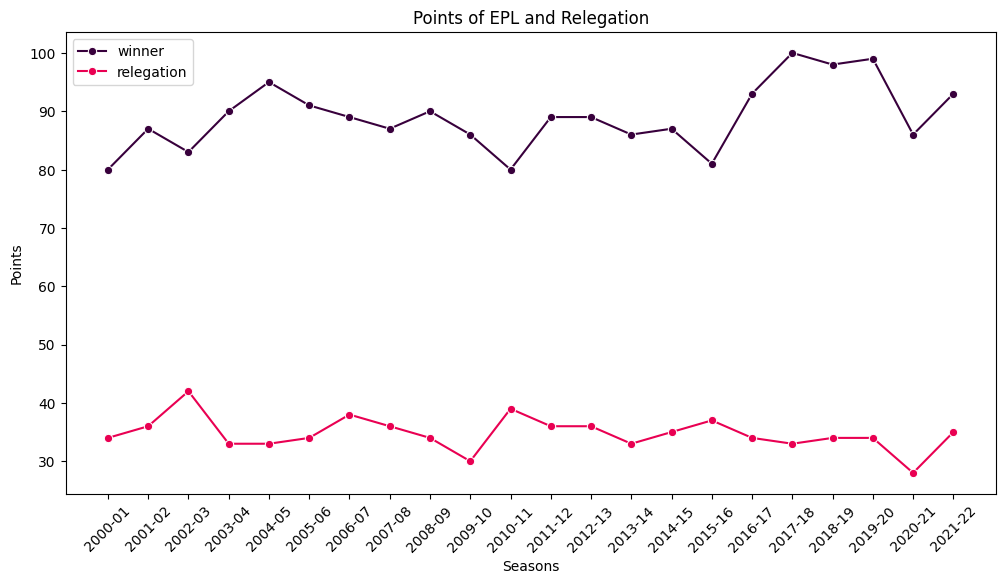

In [9]:
epl_winners = epl_condensed[epl_condensed['Pos'] == 1]
relegation_zone = epl_condensed[epl_condensed['Pos'] == 18]

epl_winners = epl_winners.reset_index(drop=True)
relegation_zone = relegation_zone.reset_index(drop=True)

plt.figure(figsize = (12,6))

sns.lineplot(x='Season', y='Pts', data=epl_winners, marker='o', color='#38003c', label='winner')
sns.lineplot(x='Season', y='Pts', data=relegation_zone, marker='o', color='#e90052', label='relegation')

plt.xticks(rotation = 45)
plt.xlabel('Seasons')
plt.ylabel('Points')
plt.title('Points of EPL and Relegation')
plt.show()

In [10]:
print(epl_winners.Pts.sub(relegation_zone.Pts).mean())

54.31818181818182


In [11]:
print(epl_winners.Pts.corr(relegation_zone.Pts))

-0.31466918678660794


# Observation
* From the output we can see that there is a negative corr between epl_winners and relagation_zone
* Also there is an average 54pts gap from top to bottom

In [12]:
team_counts = epl_condensed['Team'].value_counts()

euro_ids = epl_condensed['Result'].isin(['Champions League', 'Europa'])
euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()

<ipython-input-13-31d453d87341>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


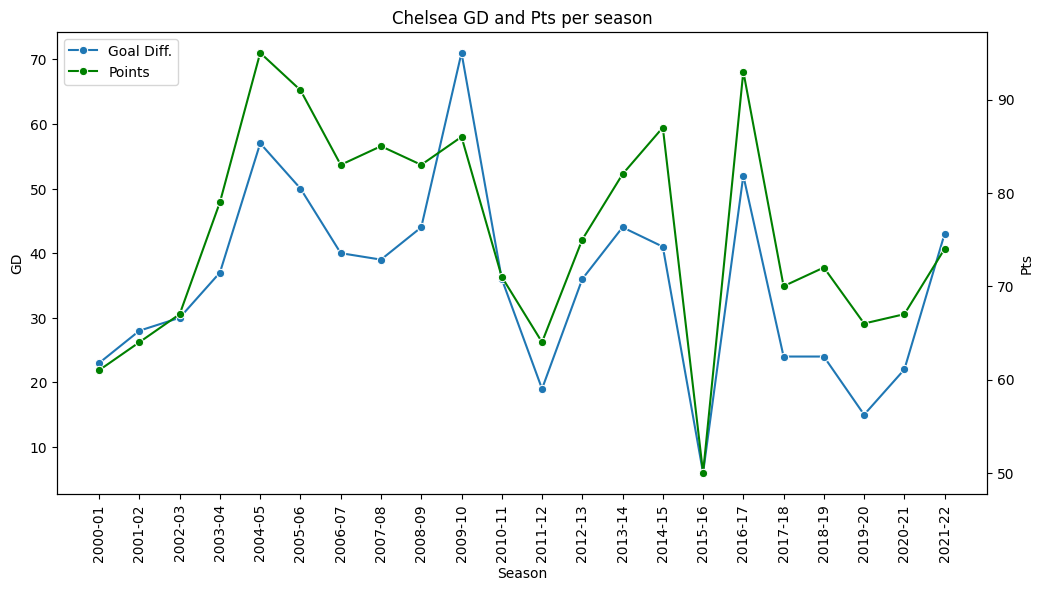

In [13]:
chelsea = epl_condensed[epl_condensed.Team == 'Chelsea']

# Set figure size
plt.figure(figsize=(12, 6))

ax = sns.lineplot(x='Season', y='GD', data=chelsea, label='Goal Diff.', marker='o')
ax2 = ax.twinx()
sns.lineplot(x='Season', y='Pts', data=chelsea, label='Points', ax=ax2, marker='o', color='green')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, loc='upper left')

ax2.get_legend().remove()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title("Chelsea GD and Pts per season")
plt.show()
